# Мощность исследования

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


*Статистическая мощность* - вероятность, с которой искомый эффект будет обнаружен, при условии, что он имеет место. 
Величина мощности также используется для вычисления размера выборки, необходимой для подтверждения гипотезы с необходимой мерой эффекта. 

::: {figure-md} alpha_beta

![](i/alpha_beta_.png)

Параметры для определения мощности критерия
:::

Уровень значимости ($\alpha$) выбирается исследователем и определяет вероятность совершения *ошибки первого рода* - "обнаружения" эффекта, которого на самом деле нет, когда случайность принимаем за истинный результат. Вероятность того, что альтернативная гипотеза верна, но решение принимается в пользу нулевой гипотезы (*ошибка второго рода*), обозначается греческой буквой $\beta$. Тогда вероятность принятия правильного решения при истинной альтернативной гипотезе (мощность) равна $1-\beta$. 

При планировании исследования желаемая мощность обычно принимается равной 0.8 или 0.9.

Эффект действия фактора - это разница между нулевой и альтернативной гипотезами, выраженная в сигмах.

[`G*Power`](https://www.psychologie.hhu.de/arbeitsgruppen/allgemeine-psychologie-und-arbeitspsychologie/gpower) - популярная программа для вычисления статистической мощности для многих различных тестов. `G*Power` также может использоваться для вычисления размеров эффекта.

Расчет мощности с параметрами для экспресс варианта теста Баланс внимания приведен на рисунке {numref}`gpower`.

::: {figure-md} gpower
![](i/gpower.png)

Окно результатов программы G\*Power при выполнении расчета мощности
:::

Другой "априорный" тип анализа мощности применяют, когда надо [найти размер выборки](https://stats.idre.ucla.edu/other/gpower/power-analysis-for-two-group-independent-sample-t-test/) для заданных уровня значимости и мощности, 0.05 и 0.8 соответственно.  При сбалансированных выборках одинакового размера отношение N1 к N2 равно 1.

::: {figure-md} gpower2
![](i/gpower2.png)

Окно результатов программы G\*Power при расчете размера выборки
:::

Таким образом, мы отвечаем на вопрос, сколько наблюдений требуется для выборки каждого типа, чтобы, по крайней мере, обнаружить эффект в 1 сигму с 80%-ной вероятностью обнаружения эффекта, если он истинен (20% ошибки типа II), и 5%-ной вероятностью обнаружения эффекта, если такого эффекта нет (ошибка типа I).

Анализ мощности обычно выполняется до проведения исследования. Перспективный или априорный анализ мощности может быть использован для оценки любого из четырех параметров мощности, но чаще всего используется для оценки требуемых размеров выборки.

Для несложных видов анализа вроде теста Стьюдента вычисление мощности сводится к расчету доли одного распределения, разрезанного в точке, рассчитанной как доля в другом распределении, сдвинутом на размер эффекта {numref}`alpha_beta`.


In [2]:
import scipy.stats as stats

n = 48
ncond = 2
effect = 1.
power = 0.8
alpha = 0.05
beta = 1 - power
n_group = n // ncond
df = n_group - 1

# позиция относительно H0
crit = stats.t.ppf(1-alpha/2, df)
# доля в H1 до позиции, сдвинутой на эффект
stats.t.cdf(crit + effect, df)

0.9972819181454754

Для точного расчёта используют нецентральное распределение Стьюдента, у которого ошибка растет с ростом "нецентральности".
Уровень значимости делим на 2, поскольку для двухстороннего теста вероятность распределяется на два хвоста в случае положительного и отрицательного эффекта.

In [3]:
crit = stats.t.ppf(1-alpha/2, df)
1 - stats.nct.cdf(crit, df, effect*np.sqrt(n_group))

0.9967937591473187

Поскольку приходится отнимать от единицы, то можно заменить на прямую и инвертированную "функции выживания" (англ. survival function).

In [4]:
crit = stats.t.isf(alpha/2, df)
stats.nct.sf(crit, df, effect*np.sqrt(n_group))

0.9967937591473187

In [5]:
from statsmodels.stats.power import ttest_power
ttest_power(effect, n_group, alpha)

0.9967937591473187

Построим график роста мощности с увеличением размера выборки для заданных эффектов.


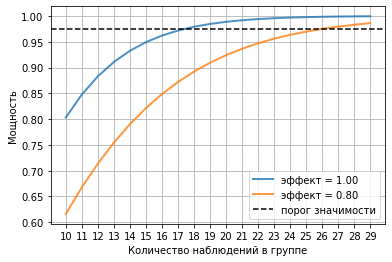

In [6]:
nn = arange(10,30)    
popo = ttest_power(effect, nn, alpha)
plot(nn, popo, lw=2, alpha=0.8, label='эффект = %4.2F' % effect)
effect2 = 0.8
popo = ttest_power(effect2, nn, alpha)
plot(nn, popo, lw=2, alpha=0.8, label='эффект = %4.2F' % effect2)
axhline(1 - alpha/2, color='k', ls='--', label='порог значимости')
xticks(nn)
grid(True)
xlabel('Количество наблюдений в группе')
ylabel('Мощность');
legend();

В пакете `statsmodels` есть специальные средства для решения этой задачи. При этом используют `scipy.optimize` для нахождения значения, удовлетворяющего уравнению расчета мощности.
Параметр, который нужно найти, передается в метод `...solve_power()` с пустым значением `None`.

In [7]:
from statsmodels.stats.power import tt_ind_solve_power

result = tt_ind_solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print(f'Размер выборки: {result:.3f}')

Размер выборки: 16.715


Для достоверного обнаружения разницы в 1 сигму (для времени реакции это около 100 мс) нужно по крайней мере 17 значений на группу.

Если выборку сделать больше, то можно будет обнаруживать разницу менее 1 сигмы. Помните, что рост дискриминационной способности статистического метода (размер ошибки) обратно пропорционален корню квадратному от размера выборки, т.е. значительное увеличение выборки ведет лишь к незначительному росту мощности.
Так в надежном варианте теста "Баланс внимания" 32 предъявления для каждого из шести видов стимуляции (2 модальности и 3 частоты предъявления). С учётом того, что 1-2 стимула могут быть пропущены, рабочий размер выборки можно считать 30 штук.


In [8]:
result = tt_ind_solve_power(effect_size=None, power=power, nobs1=30, ratio=1.0, alpha=alpha)
print(f'Обнаруживаемая разница: {result:.3f} σ')

Обнаруживаемая разница: 0.736 σ
